In [399]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats, special

from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#### Task 1

In [388]:
mouses = np.array([[5, 13], [9, 34], [18, 40], [8, 13]])

In [534]:
X_gene = []
Y_intellect = []
for i in range(mouses.shape[0]):
    for _ in range(mouses[i][0]):
        X_gene.append(1)
        Y_intellect.append(i)
    for _ in range(mouses[i][1]):
        X_gene.append(0)
        Y_intellect.append(i)

X_gene = np.array(X_gene)
Y_intellect = np.array(Y_intellect)

1a. Метод Хи-квадрат (не можем отклонить гипотезу H0)

In [631]:
def check_hypothesis_chi_squared(X, p=0.975):
    n = X.sum()
    chi_squared_sum = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            chi_squared_sum += X[i, j]**2/(X[i,:].sum() * X[:,j].sum())
    chi_squared = n * (chi_squared_sum - 1)
    chi_squared_criteria = stats.chi2.ppf(p, (X.shape[0]-1) * (X.shape[1]-1))
    if chi_squared > chi_squared_criteria:
        print("H0 is rejected!")
    else:
        print("H0 can't be rejected!")
    print(f"chi_squared: {chi_squared}, criteria: {chi_squared_criteria}")

In [632]:
check_hypothesis_chi_squared(mouses)

H0 can't be rejected!
chi_squared: 2.3415352401319023, criteria: 9.348403604496148


1b. Коэффициент корреляции Пирсона (не можем отклонить гипотезу H0, но тоже не имеет смысла применять Пирсона к этим данным)

In [538]:
def check_hypothesis_pearson_correlation(X, Y, p=0.975):
    pearson_coef = np.mean((X - np.mean(X))*(Y - np.mean(Y)))/(np.std(X)*np.std(Y))
    n = X.shape[0]
    t = pearson_coef * np.sqrt(n-2) / (np.sqrt(1-pearson_coef**2))
    t_criteria = stats.t.ppf(p, n-2)
    if np.abs(t) > t_criteria:
        print("H0 is rejected!")
    else:
        print("H0 can't be rejected!")
    print(f"pearson_coef: {pearson_coef}, t: {t}, criteria: {t_criteria}")

In [539]:
check_hypothesis_pearson_correlation(X_gene, Y_intellect)

H0 can't be rejected!
pearson_coef: 0.09850243798170102, t: 1.162796543110034, criteria: 1.9773035420129161


Проверим правильность посчитанного коэффициента корреляции Пирсона

In [541]:
stats.pearsonr(X_gene, Y_intellect)[0]

0.09850243798170102

1с. Коэффициент корреляции Спирмена (не можем отклонить гипотезу H0)

In [542]:
from collections import Counter

def check_hypothesis_spearman_correlation(X, Y, p=0.975):    
    X_cnt = Counter(X)
    Y_cnt = Counter(Y)
    X_ranks = {}
    Y_ranks = {}
    x_last_rank = 1
    y_last_rank = 1
    for value, cnt in sorted(X_cnt.items()):
        if cnt == 1:
            X_ranks[value] = x_last_rank
            x_last_rank += 1
        else:
            X_ranks[value] = (x_last_rank + (x_last_rank + cnt) - 1)/2
            x_last_rank += cnt
    for value, cnt in sorted(Y_cnt.items()):
        if cnt == 1:
            Y_ranks[value] = y_last_rank
            y_last_rank += 1
        else:
            Y_ranks[value] = (y_last_rank + (y_last_rank + cnt) - 1)/2
            y_last_rank += cnt

    X_ranks_v = np.array([X_ranks[value] for value in X])
    Y_ranks_v = np.array([Y_ranks[value] for value in Y])
    x_diff = X_ranks_v - np.mean(X_ranks_v)
    y_diff = Y_ranks_v - np.mean(Y_ranks_v)
    spearman_coef = np.sum(x_diff*y_diff)/(np.sqrt(np.sum(x_diff**2)*np.sum(y_diff**2)))
    n = X.shape[0]
    criteria = np.sqrt(n-1) * spearman_coef
    norm_criteria = stats.norm.ppf(p)
    if np.abs(criteria) > norm_criteria:
        print("H0 is rejected!")
    else:
        print("H0 can't be rejected!")
    print(f"spearman_coef: {spearman_coef}, spearman_criteria: {criteria}, norm_criteria: {norm_criteria}")

In [543]:
check_hypothesis_spearman_correlation(X_gene, Y_intellect)

H0 can't be rejected!
spearman_coef: 0.10610827460866344, spearman_criteria: 1.2509981078000985, norm_criteria: 1.959963984540054


Проверим правильность посчитанного коэффициента корреляции Спирмена

In [545]:
stats.spearmanr(X_gene, Y_intellect)[0]

0.10610827460866344

1d. Коэффициент корелляции Кендалла

По алгоритму расчета tau-B из Википедии гипотеза H0 отклонилась: https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

По алгоритму, реализованному в scipy гипотеза H0 не отклонилась.

Ответ: не можем отклонить гипотезу H0

Алгоритм из лекций давал непохожий на эти две реализации результат.

In [621]:
def check_hypothesis_kendall_correlation(X, Y, p=0.975):
    X_cnt = Counter(X)
    Y_cnt = Counter(Y)
    X_ranks = {}
    Y_ranks = {}
    x_last_rank = 1
    y_last_rank = 1
    for value, cnt in sorted(X_cnt.items()):
        if cnt == 1:
            X_ranks[value] = x_last_rank
            x_last_rank += 1
        else:
            X_ranks[value] = (x_last_rank + (x_last_rank + cnt) - 1)/2
            x_last_rank += cnt
    for value, cnt in sorted(Y_cnt.items()):
        if cnt == 1:
            Y_ranks[value] = y_last_rank
            y_last_rank += 1
        else:
            Y_ranks[value] = (y_last_rank + (y_last_rank + cnt) - 1)/2
            y_last_rank += cnt

    X_ranks_v = np.array([X_ranks[value] for value in X])
    Y_ranks_v = np.array([Y_ranks[value] for value in Y])
    data = np.column_stack((X, Y, X_ranks_v, Y_ranks_v))
    data.view('i8,i8,i8,i8').sort(order=['f0','f1'], axis=0)
    conc_n = 0
    disc_n = 0
    n = data.shape[0]
    for i in range(0, n-1):
        for j in range(i+1, n):
            if (data[i][2] == data[j][2]) or (data[i][3] == data[j][3]):
                continue
            if (data[i][2] < data[j][2]) == (data[i][3] < data[j][3]):
                conc_n += 1
            else:
                disc_n += 1
    n0 = n*(n-1)/2
    n1 = np.sum([cnt*(cnt-1)/2 for tie, cnt in X_cnt.items()])
    n2 = np.sum([cnt*(cnt-1)/2 for tie, cnt in X_cnt.items()])           
    tau = (conc_n - disc_n)/np.sqrt((n0-n1)*(n0-n2))    
    criteria = stats.norm.ppf(p, loc=0, scale=np.sqrt(2*(2*n+5)/(9*n*(n-1))))
    if np.abs(tau) > criteria:
        print("H0 is rejected!")
    else:
        print("H0 can't be rejected!")
    print(f"kendall_tau: {tau}, criteria: {criteria}")

In [622]:
check_hypothesis_kendall_correlation(X_gene, Y_intellect)

H0 is rejected!
kendall_tau: 0.12825, criteria: 0.11181314062353948


In [548]:
stats.kendalltau(X_gene, Y_intellect)

KendalltauResult(correlation=0.09828379769397348, pvalue=0.21093516779416832)

#### Task 2

Выборки, на которых разница между коэффициентами корреляции Пирсона и Спирмена больше 1.

In [478]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y1 = [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
y2 = [1500, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

traces = []
traces.append(go.Scatter(x=x, y=y1))
traces.append(go.Scatter(x=x, y=y2))
fig = go.Figure(data=traces)
iplot(fig)

In [479]:
pearson_coef = stats.pearsonr(y1, y2)[0]
spearman_coef = stats.spearmanr(y1, y2)[0]
print(f"pearson_corr: {pearson_coef}, spearman_corr: {spearman_coef}, diff: {pearson_coef - spearman_coef}")

pearson_corr: 0.40954506631288373, spearman_corr: -0.6470588235294118, diff: 1.0566038898422956


#### Task 3 (p = 0)

Для решения задачи воспользуемся:

1) формулой нахождения моментов равномерного распределения:
$$ E[X^n] = \frac{1}{n+1}\sum_{k=0}^na^kb^{n-k}$$

2) представлением ковариации в виде:
$$ cov[X, Y] = E[XY] - EXEY = E[\xi^3] - E[\xi]E[\xi^2]$$

3) представлением дисперсии в виде:
$$D[\xi^2] = E[\xi^4]-E[\xi^2]^2$$

4) знанием дисперсии равномерного распределения:
$$D[\xi] = \frac{(b-a)^2}{12}$$

Тогда:
$$\rho = \frac{E[\xi^3] - E[\xi]E[\xi^2]}{\sqrt{\frac{(b-a)^2}{12}}\sqrt{E[\xi^4]-E[\xi^2]^2}}$$

In [476]:
def get_moment(n, a, b):
    return 1/(n+1)*np.sum([a**k * b**(n-k) for k in range(0, n+1)])

a = -1
b = 1
EX = get_moment(1, a, b)
EX2 = get_moment(2, a, b)
EX3 = get_moment(3, a, b)
EX4 = get_moment(4, a, b)

cov_XY = EX3 - EX*EX2
sigma_X = np.sqrt((b-a)**2/12)
sigma_Y = np.sqrt(EX4 - EX2**2)

p = cov_XY/(sigma_X*sigma_Y)
print(f"Pearson correlation: {p}")

Pearson correlation: 0.0


Проверяем на примере

In [474]:
X_sample = np.random.uniform(-1, 1, 1000)
Y_sample = np.array([y**2 for y in np.random.uniform(-1, 1, 1000)])

In [475]:
pearson_correlation = stats.pearsonr(X_sample, Y_sample)[0]
print(f"Pearson correlation: {pearson_correlation}")

Pearson correlation: -0.0038718955371243027


#### Task 4 (H0 отклоняется)

In [484]:
def fisher_z(x):
    return 0.5 * np.log((1+x)/(1-x))

df = pd.read_csv('./IB_statistics_data_HW_1.txt', sep=' ')
X = df.ex4x.values
Y = df.ex4y.values

corr0 = 0.9
corr = stats.pearsonr(X, Y)[0]

t = np.sqrt(X.shape[0]-1) * (fisher_z(corr) - fisher_z(corr0))
criteria = stats.norm.ppf(0.975)
print(f"sample correlation: {corr}, hypothesis: {corr0}, t: {t}, criteria: {criteria}")

if np.abs(t) > criteria:
    print("H0 is rejected!")
else:
    print("H0 can't be rejected!")

sample correlation: 0.8238114063384586, hypothesis: 0.9, t: -4.14130332987004, criteria: 1.959963984540054
H0 is rejected!


#### Task 5 (не решено, но есть предположение, как) 

1. Разбиваем отрезок max(sample) - min(sample) на 15 равных интервалов (должно подойти)

2. При выбранных mu и sigma мы можем расчитать вероятность попадания в каждый из интервалов:

Для интервалов, не включающих 0: 
$$ p = \frac{6}{7}(F(b) - F(a))$$
Для интервала, включающего 0: 
$$ p = \frac{6}{7}(F(b) - F(a)) + \frac{1}{7}$$

3. Считаем частоты попадания значений выборки в эти интервалы

4. Применяем критерий согласия Хи-квадрат

#### Task 6 (по U-критерию Манна—Уитни H0 отклоняется)

In [679]:
df = pd.read_csv('./IB_statistics_data_HW_1.txt', sep=' ')
X = df.ex6x.values
Y = np.exp(df.ex6y.values)

In [685]:
def get_sample_F(sample):
    sample_cnt = Counter(sample)
    x_v = []
    y_v = []
    n = sample.shape[0]
    steps = 0
    for x, cnt in sorted(sample_cnt.items()):
        x_v.append(x)
        y_v.append(steps/n)
        steps+=cnt
    return np.array(x_v), np.array(y_v)

In [688]:
XF_x, XF_y = get_sample_F(X)
YF_x, YF_y = get_sample_F(Y)
traces = []
traces.append(go.Scatter(x=XF_x, y=XF_y, name='X'))
traces.append(go.Scatter(x=YF_x, y=YF_y, name='Y'))
fig = go.Figure(data=traces, layout=go.Layout(title='Empirical distributions functions'))
iplot(fig)

In [770]:
def check_hypothesis_mann_whitney(X, Y, p=0.975):
    U = stats.mannwhitneyu(X, Y)[0]
    n = X.shape[0]
    m = n**2/2
    s = np.sqrt(n**2*(2*n + 1)/12)
    t = (U - m)/s
    criteria = stats.norm.ppf(p)
    print(f"U:{U}, t: {t}, criteria: {criteria}")
    if np.abs(t) > criteria:
        print("H0 is rejected!")
    else:
        print("H0 can't be rejected!")

In [771]:
check_hypothesis_mann_whitney(X, Y)

U:14602.0, t: -2.757418586157495, criteria: 1.959963984540054
H0 is rejected!


#### Task 7 (H0 не отклоняется по U-критерию Манна—Уитни, выборки из одного распределения)

In [774]:
from collections import Counter
df = pd.read_csv('./IB_statistics_data_HW_1.txt', sep=' ')
X = df.ex7x.values
Y = df.ex7y.values

Построим распределения значений в обеих выборках

In [775]:
cnt_x = Counter(X)
cnt_y = Counter(Y)
letters = ['A', 'B', 'C', 'D', 'E', 'F']
y1 = [cnt_x[l] for l in letters]
y2 = [cnt_y[l] for l in letters]

traces = []
traces.append(go.Bar(x=letters, y=y1, name='etalon'))
traces.append(go.Bar(x=letters, y=y2, name='shifted'))
fig = go.Figure(data=traces)
iplot(fig)

На графике заметно, что сдвинуты A, C, F. Поменяем их и снова построим гистограмму

In [776]:
replaces = {'A':'C', 'B':'B', 'C':'F', 'D':'D', 'E':'E', 'F':'A'}
Y_norm = [replaces[y] for y in Y]

cnt_x = Counter(X)
cnt_y = Counter(Y_norm)
letters = ['A', 'B', 'C', 'D', 'E', 'F']
y1 = [cnt_x[l] for l in letters]
y2 = [cnt_y[l] for l in letters]

traces = []
traces.append(go.Bar(x=letters, y=y1, name='etalon'))
traces.append(go.Bar(x=letters, y=y2, name='normal'))
fig = go.Figure(data=traces)
iplot(fig)

Проверим гипотезу об однородности двух выборок с помощью U-критерия Манна—Уитни

In [777]:
check_hypothesis_mann_whitney(X, Y_norm)

U:16673.5, t: -0.7758079699475207, criteria: 1.959963984540054
H0 can't be rejected!


#### Task 8

8a. Коэффициент корелляции

$$E[\alpha] = 0$$
$$D[\alpha] = \frac{(b-a)^2}{12} = \frac{1}{3}$$

$$E[\xi_1] = E[\xi_1] = 0$$
$$D[\xi_1] = 29D[\alpha]$$
$$D[\xi_2] = 117D[\alpha]$$


$$cov[\xi_1, \xi_2] = E[\xi_1\xi_2] - E[\xi_1]E[\xi_2] = E[\xi_1\xi_2] = E[\xi_1(\xi_1 + \nu)] = E[\xi_1^2] + E[\xi_1\nu] = E[\xi_1^2] + E[\xi_1]E[\nu] = E[\xi_1^2]$$
$$cov[\xi_1, \xi_2] = E[\xi_1^2] = D[\xi_1] + (E[\xi_1])^2 = 29D[\alpha]$$

$$\rho = \frac{29D[\alpha]}{\sqrt{29D[\alpha]}\sqrt{117D[\alpha]}} = 0.498$$



 

8b. Выборочный коэффициент корреляции на основе смоделированных выборок

In [639]:
n = 100
X = []
Y = []
for i in range(n):
    alphas = np.random.uniform(-1, 1, 117)
    X.append(np.sum(alphas[0:29]))
    Y.append(np.sum(alphas))
X = np.array(X)
Y = np.array(Y)
sample_corr = stats.pearsonr(X, Y)[0]
print(f"Sample correlation: {sample_corr}")

Sample correlation: 0.5224580248391305


8с. Доверительный интервал

In [647]:
def fisher_z(x):
    return 0.5 * np.log((1+x)/(1-x))

def calculate_pearson_interval(X, Y, p=0.975):
    pc = stats.pearsonr(X, Y)[0]
    n = X.shape[0]
    se = 1/np.sqrt(n-3)
    quantile = stats.norm.ppf(p)
    z = fisher_z(pc)
    z1 = z - p*se
    z2 = z + p*se
    interval_low = (np.exp(2*z1) - 1)/(np.exp(2*z1) + 1)
    interval_upp = (np.exp(2*z2) - 1)/(np.exp(2*z2) + 1)
    return(pc, interval_low, interval_upp)
    
sample_corr, interval_low, interval_upp = calculate_pearson_interval(X, Y)
print(f"Sample correlation: {sample_corr}, confidence interval: ({interval_low}, {interval_upp})")

Sample correlation: 0.5224580248391305, confidence interval: (0.4468187943536646, 0.5906807288486697)


8d. График зависимости длины доверительного интервала от размера выборки

In [652]:
n_samples = []
interval_length = []
for n in range(100, 10100, 100):
    X = []
    Y = []
    for i in range(n):
        alphas = np.random.uniform(-1, 1, 117)
        X.append(np.sum(alphas[0:29]))
        Y.append(np.sum(alphas))
    X = np.array(X)
    Y = np.array(Y)
    sample_corr, interval_low, interval_upp = calculate_pearson_interval(X, Y)
    n_samples.append(n)
    interval_length.append(interval_upp - interval_low)

In [662]:
traces = []
traces.append(go.Scatter(x=n_samples, y=interval_length))
fig = go.Figure(data=traces, layout=go.Layout(title='Confidence interval length',
                                              xaxis={'title':'n'},
                                              yaxis={'title': 'interval length'}))
iplot(fig)

#### Z Загадка (пока не решено)

In [45]:
df = pd.read_csv('./IB_statistics_data_Z1.txt', sep=' ')

In [66]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
correlations = []
for i in range(0, len(letters)):
    for j in range(i+1, len(letters)):
        correlations.append((spearmanr(df[letters[i]].values, df[letters[j]].values).correlation,
                             letters[i], letters[j]))

In [67]:
print(sorted(correlations))

[(-0.9080614439324115, 'J', 'K'), (-0.627416282642089, 'A', 'I'), (-0.627416282642089, 'G', 'I'), (-0.4426268934895685, 'D', 'E'), (-0.4241904761904762, 'D', 'K'), (-0.41672138408250997, 'E', 'I'), (-0.3058064516129032, 'B', 'C'), (-0.13083870967741934, 'B', 'I'), (-0.11692780337941627, 'B', 'D'), (-0.10033179723502303, 'H', 'J'), (-0.08336712749615974, 'B', 'H'), (-0.07414439324116742, 'I', 'K'), (-0.06301075268817204, 'C', 'I'), (-0.049757296466973876, 'F', 'I'), (-0.043299539170506905, 'B', 'F'), (-0.042003072196620576, 'F', 'J'), (-0.017892473118279566, 'B', 'J'), (-0.016525928414847662, 'E', 'K'), (-0.007029185867895543, 'A', 'J'), (-0.007029185867895543, 'G', 'J'), (-0.002592933947772657, 'A', 'H'), (-0.002592933947772657, 'G', 'H'), (-0.0023348694316436248, 'B', 'K'), (0.00648847926267281, 'I', 'J'), (0.013846048131358854, 'E', 'J'), (0.022778982409654886, 'A', 'E'), (0.022778982409654886, 'E', 'G'), (0.02446082949308755, 'D', 'F'), (0.03155145929339477, 'F', 'K'), (0.0374685099

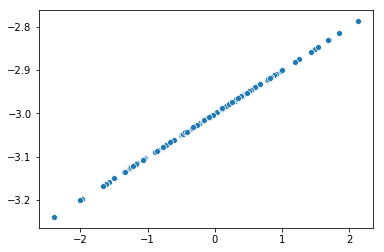

In [70]:
sns.scatterplot(df.A.values, df.G.values)

In [79]:
df.G.values[0], df.A.values[0]

(-3.12689391957483, -1.2689391957483)

In [80]:
df.G.values[1], df.A.values[1]

(-2.96568865115341, 0.34311348846588596)

In [81]:
b = -(1.2689391957483 * 2.96568865115341 + 3.12689391957483) / 2.2689391957483

In [83]:
a = (-3.12689391957483 - b) / -1.2689391957483

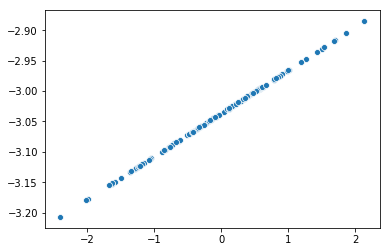

In [87]:
sns.scatterplot(df.A.values, df.A.values * a + b)

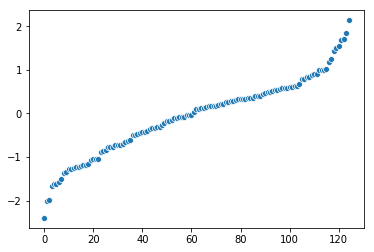

In [89]:
sns.scatterplot(x=range(0, len(df.A.values)), y=sorted(df.A.values))

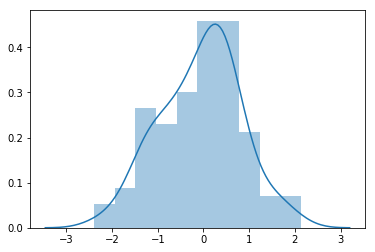

In [109]:
sns.distplot(df.A.values)

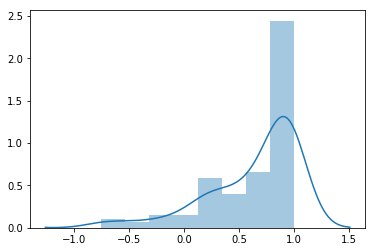

In [91]:
sns.distplot(df.B.values)

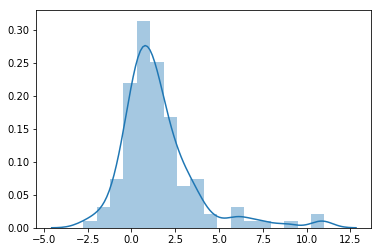

In [92]:
sns.distplot(df.C.values)

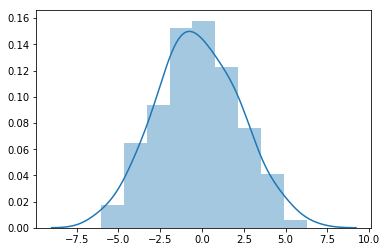

In [93]:
sns.distplot(df.D.values)

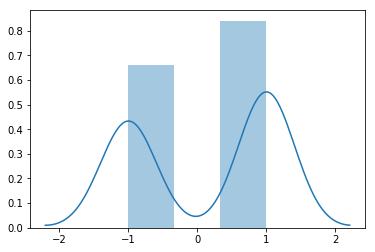

In [95]:
sns.distplot(df.E.values)

In [106]:
from collections import Counter
cnt = Counter(df.E.values)
cnt

Counter({-1: 55, 1: 70})

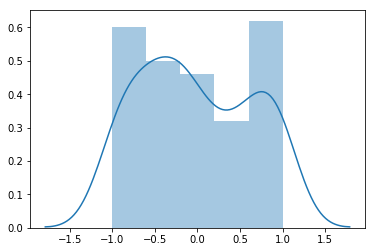

In [96]:
sns.distplot(df.F.values)

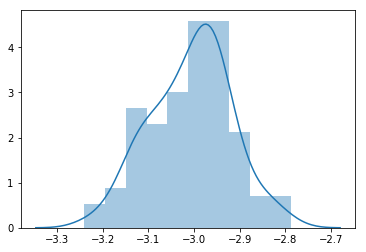

In [97]:
sns.distplot(df.G.values)

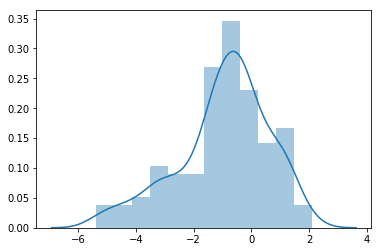

In [98]:
sns.distplot(df.H.values)

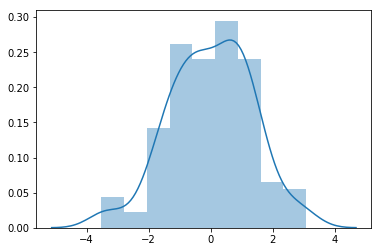

In [99]:
sns.distplot(df.I.values)

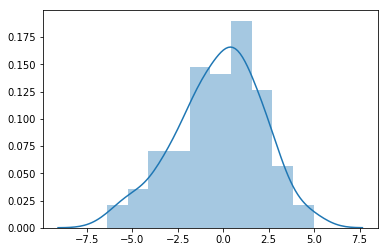

In [100]:
sns.distplot(df.J.values)

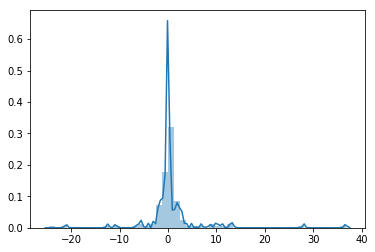

In [101]:
sns.distplot(df.K.values)

#### Extra

In [772]:
def check_hypotesis_kolmogorov_smirnov(X, Y):
    diffs = []
    nx = X.shape[0]
    ny = Y.shape[0]
    for value in X:
        x_f_value = X[np.where(X < value)].shape[0]/nx
        y_f_value = Y[np.where(Y < value)].shape[0]/ny
        diffs.append(np.abs(x_f_value - y_f_value))
    for value in Y:
        x_f_value = X[np.where(X < value)].shape[0]/nx
        y_f_value = Y[np.where(Y < value)].shape[0]/ny
        diffs.append(np.abs(x_f_value - y_f_value))
    t = np.sqrt(nx*ny)/(nx+ny) * np.max(diffs)
    ks_criteria = 1.36 * np.sqrt((nx+ny)/(nx*ny))
    print(f"t: {t}, kolmogorov-smirnov criteria: {ks_criteria}")
    if t > ks_criteria:
        print("H0 is rejected!")
    else:
        print("H0 can't be rejected!")